# Praktische Optimierung Blatt 03
### Tobias Lotz:  217856 <br>
### Alexander van der Staay:  185444

In [211]:
import numpy as np
import matplotlib.pyplot as plt
from kompasssuche import kompasssuche 
from scipy.optimize import minimize

In [212]:
def f(x, y): return x**2 + y**2 + 21 * np.sin(x) * np.cos(y) + 2 * (np.abs(x)**2 + np.abs(y)**2) + 0.25 * y
def g(x): return x[0]**2 + x[1]**2 + 21 * np.sin(x[0]) * np.cos(x[1]) + 2 * (np.abs(x[0])**2 + np.abs(x[1])**2) + 0.25 * x[1]

### Aufgabe 4.1

In [213]:
xs = ys = np.linspace(-10, 10, num=51, dtype=np.float32)

### Beschreibung des Vorgehens
Der Optimierungsalgorithmus A (KPS, BFGS oder L-BFGS-B) wird für jede Kombination aus $[-10, 10] \times [-10, 10]$ (diskrete Aufteilung des Intervalls) als Startpunkt ausgeführt. Alle diese Startpunkte, die in das selbe lokale Minimum laufen, bilden das Attraktionsgebiet dieses Minimums. Für alle Gefundenen Minima wird geprüft, welche Indizes der Startpunkte in diese herein laufen. Die Groups-Liste bekommt nun eine Farbe für jedes Minimum zugewiesen. Diese werden alle an die entsprechenden Indizes eingefügt und anschließend visualisiert.

### Kompasssuche

In [214]:
starting_points = []
local_minima = []
fn_values = []

for x in xs:
    for y in ys:
        s0 = np.array([x, y])
        starting_points.append(s0)
        kps_result = kompasssuche(g, s0)
        local_minima.append(np.round(kps_result['x'], 2).astype(np.float32))
        fn_values.append(np.round(kps_result['fx'], 2).astype(np.float32))

In [215]:
all_minima = np.unique(np.array(local_minima), axis=0)
groups = []
coloring = {0 : 'red', 1 : 'blue', 2 : 'green', 3 : 'orange'}
fn_mapping = {}
for j, (x, y) in enumerate(local_minima):
    for i, (x_min, y_min) in enumerate(all_minima):
        if x == x_min and y == y_min:
            groups.append(coloring[i])
            if coloring[i] not in fn_mapping:
                fn_mapping[coloring[i]] = fn_values[j]

In [216]:
all_minima

array([[-1.22, -0.01],
       [ 1.08,  2.29],
       [ 1.09, -2.32],
       [ 3.39, -0.02]], dtype=float32)

In [217]:
x_mins = []
y_mins = []
for points in all_minima:
    x_mins.append(points[0])
    y_mins.append(points[1])

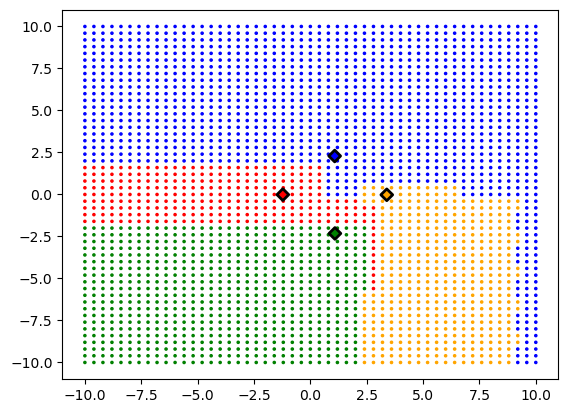

In [218]:
Y, X = np.meshgrid(xs, ys)
plt.title("Kompasssuche")
plt.scatter(X, Y, marker='.', c=groups, s=10)
plt.scatter(x_mins, y_mins, c=['red', 'blue', 'green', 'orange'], 
            marker='D', linewidths=2 ,edgecolors='black')

In [183]:
groups = np.array(groups)
total = groups.shape[0]

p_blue = groups[groups == 'blue'].shape[0] / total
p_red = groups[groups == 'red'].shape[0] / total
p_green = groups[groups == 'green'].shape[0] / total
p_orange = groups[groups == 'orange'].shape[0] / total

In [219]:
print(f'Class:\t\tProbability:\tFunction-value:')
print(f'blue  \t\t{p_blue : .2f}\t\t{fn_mapping["blue"] : .2f}')
print(f'red   \t\t{p_red : .2f}\t\t{fn_mapping["red"] : .2f}')
print(f'green \t\t{p_green : .2f}\t\t{fn_mapping["green"] : .2f}')
print(f'orange\t\t{p_orange : .2f}\t\t{fn_mapping["orange"] : .2f}')

Class:		Probability:	Function-value:
blue  		 0.47		 7.60
red   		 0.11		-15.26
green 		 0.25		 6.45
orange		 0.17		 29.31


### BFGS

In [221]:
starting_points = []
local_minima = []
fn_values = []

for x in xs:
    for y in ys:
        s0 = np.array([x, y])
        starting_points.append(s0)
        kps_result = minimize(g, s0, method='BFGS')
        local_minima.append(np.round(kps_result['x'], 2).astype(np.float32))
        fn_values.append(np.round(kps_result['fun'], 2).astype(np.float32))

In [222]:
all_minima = np.unique(np.array(local_minima), axis=0)
groups = []
coloring = {0 : 'red', 1 : 'blue', 2 : 'green', 3 : 'orange'}
fn_mapping = {}
for j, (x, y) in enumerate(local_minima):
    for i, (x_min, y_min) in enumerate(all_minima):
        if x == x_min and y == y_min:
            groups.append(coloring[i])
            if coloring[i] not in fn_mapping:
                fn_mapping[coloring[i]] = fn_values[j]

In [223]:
all_minima

array([[-1.22, -0.01],
       [ 1.08,  2.29],
       [ 1.09, -2.32],
       [ 3.39, -0.02]], dtype=float32)

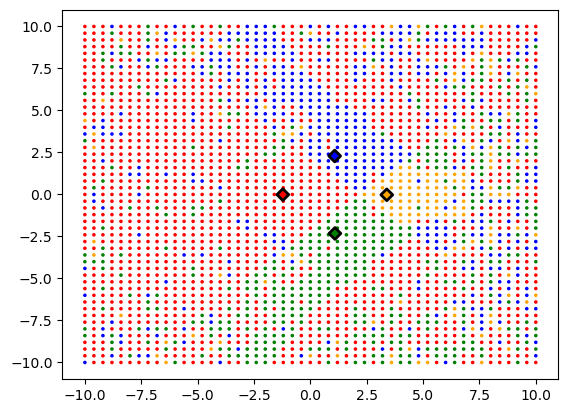

In [224]:
Y, X = np.meshgrid(xs, ys)
plt.title("BFGS")
plt.scatter(X, Y, marker='.', c=groups, s=10)
plt.scatter(x_mins, y_mins, c=['red', 'blue', 'green', 'orange'], 
            marker='D', linewidths=2 ,edgecolors='black')

In [225]:
groups = np.array(groups)
total = groups.shape[0]

p_blue = groups[groups == 'blue'].shape[0] / total
p_red = groups[groups == 'red'].shape[0] / total
p_green = groups[groups == 'green'].shape[0] / total
p_orange = groups[groups == 'orange'].shape[0] / total

In [226]:
print(f'Class:\t\tProbability:\tFunction-value:')
print(f'blue  \t\t{p_blue : .2f}\t\t{fn_mapping["blue"] : .2f}')
print(f'red   \t\t{p_red : .2f}\t\t{fn_mapping["red"] : .2f}')
print(f'green \t\t{p_green : .2f}\t\t{fn_mapping["green"] : .2f}')
print(f'orange\t\t{p_orange : .2f}\t\t{fn_mapping["orange"] : .2f}')

Class:		Probability:	Function-value:
blue  		 0.17		 7.60
red   		 0.58		-15.26
green 		 0.18		 6.45
orange		 0.07		 29.31


### L-BFGS-B

In [227]:
starting_points = []
local_minima = []
fn_values = []

for x in xs:
    for y in ys:
        s0 = np.array([x, y])
        starting_points.append(s0)
        kps_result = minimize(g, s0, method='L-BFGS-B')
        local_minima.append(np.round(kps_result['x'], 2).astype(np.float32))
        fn_values.append(np.round(kps_result['fun'], 2).astype(np.float32))

In [228]:
all_minima = np.unique(np.array(local_minima), axis=0)
groups = []
coloring = {0 : 'red', 1 : 'blue', 2 : 'green', 3 : 'orange'}
fn_mapping = {}
for j, (x, y) in enumerate(local_minima):
    for i, (x_min, y_min) in enumerate(all_minima):
        if x == x_min and y == y_min:
            groups.append(coloring[i])
            if coloring[i] not in fn_mapping:
                fn_mapping[coloring[i]] = fn_values[j]

In [229]:
all_minima

array([[-1.22, -0.01],
       [ 1.08,  2.29],
       [ 1.09, -2.32],
       [ 3.39, -0.02]], dtype=float32)

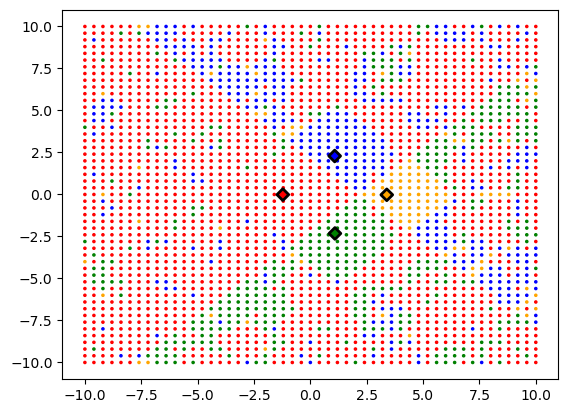

In [230]:
Y, X = np.meshgrid(xs, ys)
plt.title("L-BFGS-B")
plt.scatter(X, Y, marker='.', c=groups, s=10)
plt.scatter(x_mins, y_mins, c=['red', 'blue', 'green', 'orange'], 
            marker='D', linewidths=2 ,edgecolors='black')

In [231]:
groups = np.array(groups)
total = groups.shape[0]

p_blue = groups[groups == 'blue'].shape[0] / total
p_red = groups[groups == 'red'].shape[0] / total
p_green = groups[groups == 'green'].shape[0] / total
p_orange = groups[groups == 'orange'].shape[0] / total

In [232]:
print(f'Class:\t\tProbability:\tFunction-value:')
print(f'blue  \t\t{p_blue : .2f}\t\t{fn_mapping["blue"] : .2f}')
print(f'red   \t\t{p_red : .2f}\t\t{fn_mapping["red"] : .2f}')
print(f'green \t\t{p_green : .2f}\t\t{fn_mapping["green"] : .2f}')
print(f'orange\t\t{p_orange : .2f}\t\t{fn_mapping["orange"] : .2f}')

Class:		Probability:	Function-value:
blue  		 0.15		 7.60
red   		 0.64		-15.26
green 		 0.16		 6.45
orange		 0.05		 29.31


### Interpretation der Plots
Im Plot der Kompasssuche ist zu sehen, dass die verschiedenen Farben zusammenhängende Flächen bilden. Die entsprechenden Minima liegen in den Flächen. Das bedeutet, dass die Kompasssuche für Punkte welche nahe bei einander liegen, häufig in das selbe lokale Minimum läuft. Vermutlich werden keine lokalen Minima "übersprungen" und Punkte laufen größtenteils in das örtlich "nächste" Minimum vom Startpunkt. Außerdem ist ein Großteil der Gitterpunkte blau gefärbt. <br>
In den anderen beiden Plots, sind kleine einfarbige Flächen in der Nähe der Minima zu sehen. Ansonsten liegt eher ein Flickenteppich ähnlich Farbverteilung vor, also kleinere gleichfarbige Flächen sind überall auf dem Gitter verteilt. Ein sehr großer Anteil der Punkte ist hier rot, also wird das tatsächliche globale Minimum häufig gefunden und insbesondere auch von Punkten die weiter entfernt starten. Die Flächen in der nähe der lokalen Minima bedeuten, dass Punkte welche sehr nahe oder genau in einem lokalen Minimum starten, auch wahrscheinlich in diesem Verweilen werden. 
 

### Wahrscheinlichkeiten

| Klasse | Kompasssuche | BFGS | L-BFGS-B |
|:-------|:-------------|:------|:---------|
|Blau    |$0.47$ | $0.17$ | $0.15$ |
|Rot     |$0.11$ | $0.58$ | $0.64$ |
|Grün    |$0.25$ | $0.18$ | $0.16$ |
|Orange  |$0.17$ | $0.07$ | $0.05$ |

Die Werte der Funktionen BFGS und L-BFGS-B sind in etwa gleich groß. Die Kompasssuche kommt allerdings auf Wahrscheinlichkeiten, die sich deutlich von denen der anderen unterscheiden, bspw. kommt die Klasse "Blau" deutlich öfter vor. Da es sich bei der Klasse "Rot" um den kleinsten Funktionswert handelt, eignet sich der Algorithmus L-BFGS-B am besten. Dieser weißt eine Wahrscheinlichkeit von 64% auf, das globale optimum zu finden.

# Aufgabe 4.2

In [298]:
def multi_start(f, A, x0, retval_name="fun", **kwargs):
    x_best = x0[0]
    f_min_best = A(f, x0[0], **kwargs)[retval_name]
    for x in x0[1:]:
        f_min = A(f, x, **kwargs)[retval_name]
        if f_min < f_min_best:
            x_best = x
            f_min_best = f_min
    return {"x" : x_best, "fx" : f_min_best}

In [251]:
np.random.seed(1)

xs = np.random.uniform(-10, 10, (100, 2))

In [299]:
multi_start(g, kompasssuche, xs, retval_name="fx")

{'x': array([-7.93547987, -1.04212948]), 'fx': -15.257310902705402}

In [300]:
multi_start(g, minimize, xs, method="BFGS")

{'x': array([-4.73406459, -8.68077819]), 'fx': -15.2573109027054}

In [301]:
multi_start(g, minimize, xs, method="L-BFGS-B")

{'x': array([-3.46710196,  0.54116205]), 'fx': -15.257310902705399}

Die Optima sind in der Tabelle angegeben.
|Methode|Optimum|Funktionswert|
|:------|:------|:------------|
|KPS|$(-7.94, -1.04)$|$-15.26$|
|BFGS|$(-4.73, -8.68)$|$-15.26$|
|L-BFGS-B|$(-3.47, 0.54)$|$-15.26$|

Die Gefundenen Ergebnisse sind 3 unterschiedliche Punkte, die aber den selben Funktionswert aufweisen (wenn man auf 2 Nachkommastellen rundet). Keines dieser Minima ist global.